In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
from dataset import load_svhn, random_split_train_val
from gradient_check import check_layer_gradient, check_layer_param_gradient, check_model_gradient
from layers import FullyConnectedLayer, ReLULayer
from model import TwoLayerNet
from trainer import Trainer, Dataset
from optim import SGD, MomentumSGD
from metrics import multiclass_accuracy

%load_ext autoreload
%autoreload 2

# Data Loading

In [3]:
def prepare_for_neural_network(train_X, test_X):
    train_flat = train_X.reshape(train_X.shape[0], -1).astype(np.float) / 255.0
    test_flat = test_X.reshape(test_X.shape[0], -1).astype(np.float) / 255.0

    mean_image = np.mean(train_flat, axis = 0)
    train_flat -= mean_image
    test_flat -= mean_image
    
    return train_flat, test_flat
    
train_X, train_y, test_X, test_y = load_svhn("data", max_train=10000, max_test=1000)    
train_X, test_X = prepare_for_neural_network(train_X, test_X)
train_X, train_y, val_X, val_y = random_split_train_val(train_X, train_y, num_val = 1000)

In [4]:
X = np.array([[1,-2,3],
              [-1, 2, 0.1]
              ])

assert check_layer_gradient(ReLULayer(), X)

Gradient check passed!


In [5]:
assert check_layer_gradient(FullyConnectedLayer(3, 4), X)
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'W')
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'B')

Gradient check passed!
Gradient check passed!
Gradient check passed!


## Simple neural network

In [6]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 0)
loss = model.compute_loss_and_gradients(train_X[:2], train_y[:2])

check_model_gradient(model, train_X[:2], train_y[:2])

Checking gradient for layer_one_W
Gradient check passed!
Checking gradient for layer_one_B
Gradient check passed!
Checking gradient for layer_two_W
Gradient check passed!
Checking gradient for layer_two_B
Gradient check passed!


True

In [7]:
model_with_reg = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 1e1)
loss_with_reg = model_with_reg.compute_loss_and_gradients(train_X[:2], train_y[:2])
assert loss_with_reg > loss and not np.isclose(loss_with_reg, loss), \
    "Loss with regularization (%2.4f) should be higher than without it (%2.4f)!" % (loss, loss_with_reg)

check_model_gradient(model_with_reg, train_X[:2], train_y[:2])

Checking gradient for layer_one_W
Gradient check passed!
Checking gradient for layer_one_B
Gradient check passed!
Checking gradient for layer_two_W
Gradient check passed!
Checking gradient for layer_two_B
Gradient check passed!


True

In [8]:
multiclass_accuracy(model_with_reg.predict(train_X[:30]), train_y[:30]) 

0.1

In [ ]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-5)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate = 1e-2, num_epochs=10)

loss_history, train_history, val_history = trainer.fit()

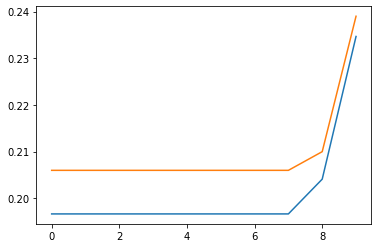

In [46]:
plt.plot(train_history)
plt.plot(val_history)

## Learning rate decay testing

In [53]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-5)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate_decay=0.99)

initial_learning_rate = trainer.learning_rate
loss_history, train_history, val_history = trainer.fit()

Loss: 2.309382, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.333564, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.186493, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.277013, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.150604, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.272480, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.211421, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.104744, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.338061, Train accuracy: 0.202889, val accuracy: 0.211000
Loss: 2.194683, Train accuracy: 0.222333, val accuracy: 0.227000
Loss: 2.091175, Train accuracy: 0.249889, val accuracy: 0.253000
Loss: 2.129078, Train accuracy: 0.270556, val accuracy: 0.270000
Loss: 2.117168, Train accuracy: 0.278667, val accuracy: 0.273000
Loss: 1.924652, Train accuracy: 0.286222, val accuracy: 0.292000
Loss: 1.854782, Train accuracy: 0.298333, val accuracy: 0.300000
Loss: 1.898645, Train acc

# Momentum SGD

In [59]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-5)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=1e-4, learning_rate_decay=0.99)

trainer.fit()

Loss: 2.302877, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.287938, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.285009, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.304552, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.234153, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.266739, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.294199, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.251000, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.235219, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.155180, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.209602, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.200314, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.242598, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.275290, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.277295, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 2.299891, Train acc

## overfit test

In [60]:
data_size = 15
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
trainer = Trainer(model, dataset, SGD(), learning_rate=1e-1, num_epochs=150, batch_size=5)

trainer.fit()

Loss: 2.327169, Train accuracy: 0.200000, val accuracy: 0.133333
Loss: 2.328291, Train accuracy: 0.200000, val accuracy: 0.133333
Loss: 2.289504, Train accuracy: 0.200000, val accuracy: 0.133333
Loss: 2.295464, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.255607, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.312813, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 2.239562, Train accuracy: 0.266667, val accuracy: 0.066667
Loss: 2.218890, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.075479, Train accuracy: 0.333333, val accuracy: 0.000000
Loss: 2.003545, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.925981, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 2.288333, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 2.123662, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 2.134734, Train accuracy: 0.333333, val accuracy: 0.000000
Loss: 1.962248, Train accuracy: 0.333333, val accuracy: 0.000000
Loss: 2.020383, Train acc

## Hyperparameters

In [75]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-3)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
trainer = Trainer(model, dataset, MomentumSGD(momentum=0.99), learning_rate=1e-1, num_epochs=20, batch_size=5, learning_rate_decay=0.99)

trainer.fit()

Loss: 2.298044, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 2.279735, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 2.230451, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.223592, Train accuracy: 0.333333, val accuracy: 0.066667
Loss: 2.039049, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 1.286264, Train accuracy: 0.333333, val accuracy: 0.066667
Loss: 1.675024, Train accuracy: 0.466667, val accuracy: 0.000000
Loss: 1.795185, Train accuracy: 0.533333, val accuracy: 0.000000
Loss: 1.599594, Train accuracy: 0.466667, val accuracy: 0.066667
Loss: 0.997389, Train accuracy: 0.733333, val accuracy: 0.000000
Loss: 0.955682, Train accuracy: 0.666667, val accuracy: 0.000000
Loss: 0.895392, Train accuracy: 0.800000, val accuracy: 0.066667
Loss: 0.295018, Train accuracy: 1.000000, val accuracy: 0.000000
Loss: 0.113715, Train accuracy: 0.933333, val accuracy: 0.000000
Loss: 0.077294, Train accuracy: 0.933333, val accuracy: 0.000000
Loss: 0.075627, Train acc

# Final training

In [9]:
dataset = Dataset(train_X, train_y, val_X, val_y)
decay = [0.95, 0.99]
rate = [1e-2, 1e-3]
reg = [1e-5, 1e-6, 1e-7]
batch = [128, 256]

loss_history, train_history, val_history = None, None, None
best_val_accuracy = 0

for decay_ in decay:
    for rate_ in rate:
        for reg_ in reg:
            for batch_ in batch:
                model = TwoLayerNet(n_input=train_X.shape[1], n_output=10, hidden_layer_size=100, reg=reg_)
                trainer = Trainer(model, dataset, MomentumSGD(), learning_rate_decay=decay_, 
                                  learning_rate=rate_, num_epochs=200, batch_size=batch_)
                loss, train, val = trainer.fit()
                if val[-1] > best_val_accuracy:
                    best_decay, best_rate, best_reg = decay_, rate_, reg_
                    best_val_accuracy = val[-1]
                    best_classifier = model
                    loss_history, train_history, val_history = loss, train, val
                print('rate: %f, reg: %f, decay: %f, val: %f' % (rate_, reg_, decay_, val[-1]))

print('best validation accuracy achieved: %f' % best_val_accuracy)

E: 0, Loss: 2.221814, Train accuracy: 0.196667, val accuracy: 0.206000
E: 1, Loss: 2.132739, Train accuracy: 0.196667, val accuracy: 0.206000
E: 2, Loss: 2.185280, Train accuracy: 0.196667, val accuracy: 0.206000
E: 3, Loss: 2.298328, Train accuracy: 0.196667, val accuracy: 0.206000
E: 4, Loss: 2.138627, Train accuracy: 0.196667, val accuracy: 0.206000
E: 5, Loss: 2.105644, Train accuracy: 0.196667, val accuracy: 0.206000
E: 6, Loss: 2.195444, Train accuracy: 0.196667, val accuracy: 0.206000
E: 7, Loss: 2.023940, Train accuracy: 0.221778, val accuracy: 0.230000
E: 8, Loss: 2.079800, Train accuracy: 0.247333, val accuracy: 0.247000
E: 9, Loss: 1.901445, Train accuracy: 0.267778, val accuracy: 0.264000
E: 10, Loss: 2.126757, Train accuracy: 0.282556, val accuracy: 0.286000
E: 11, Loss: 1.991049, Train accuracy: 0.299111, val accuracy: 0.300000
E: 12, Loss: 1.938687, Train accuracy: 0.318111, val accuracy: 0.320000
E: 13, Loss: 1.943758, Train accuracy: 0.334778, val accuracy: 0.337000
E:

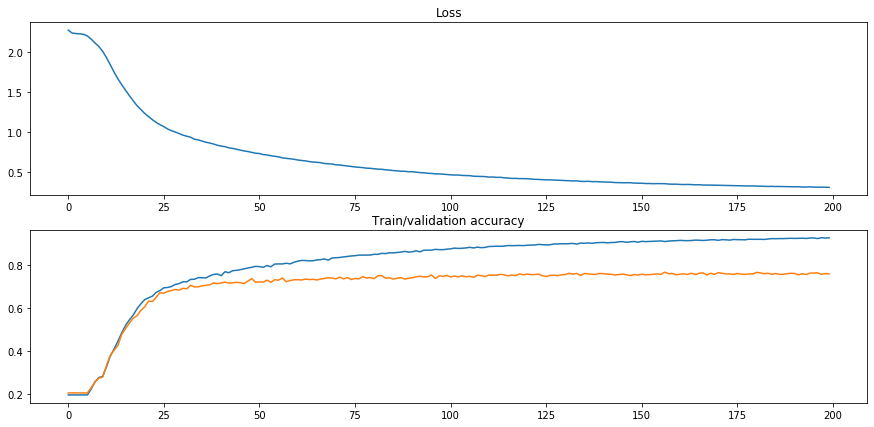

In [10]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.title("Loss")
plt.plot(loss_history)
plt.subplot(212)
plt.title("Train/validation accuracy")
plt.plot(train_history)
plt.plot(val_history)

In [94]:
test_pred = best_classifier.predict(test_X)
test_accuracy = multiclass_accuracy(test_pred, test_y)
print('Neural net test set accuracy: %f' % (test_accuracy, ))

Neural net test set accuracy: 0.726000
